In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn-deep")

In [3]:
images = ["lenna" , "airplane" , "mandril" , "pepper" , "sailboat" , "yacht"]
legends = ["lenna" , "airplane" , "mandrill" , "pepper" , "sailboat" , "yacht"]

methods = ["VB-CIQ" , "FASTOCTREE" , "K-MEANS" , "MAXIMUM" , "MEDIAN CUT"]

In [4]:
data = {}
for method in methods:
    data[method] = {}
    for image in images:
        data[method][image] = {}
        for i in range(3,9):
            with open(method + "/results/" + image + "/k"+str(2**i) + "/result.json" , "r") as f:
                data[method][image][2**i] = json.load(f)

C:\Users\agarw\AppData\Local\Temp/ipykernel_8320/3935995521.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2**k for k in range(2,9)])


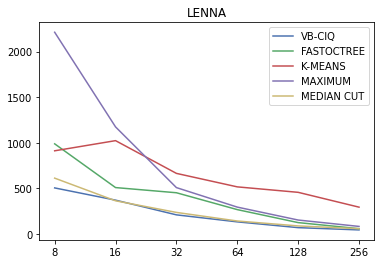

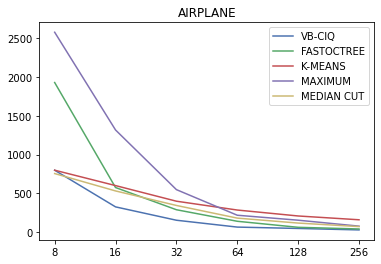

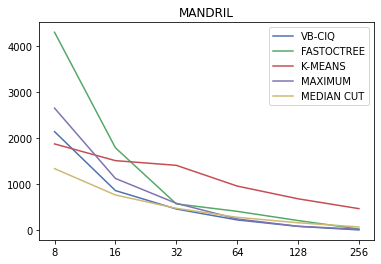

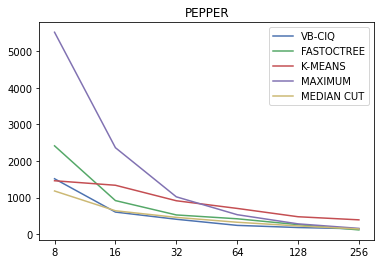

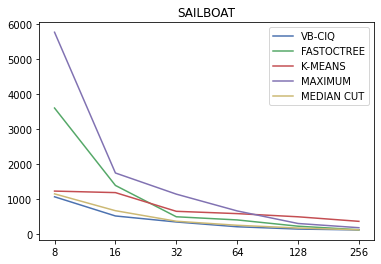

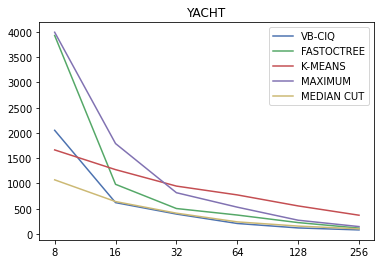

In [5]:
#MSE
for image in images:
    fig, ax = plt.subplots()
    ax.set_xticklabels([2**k for k in range(2,9)])
    lines = [] 
    for method in methods:
        temp = []
        for i in range(3,9):
            temp.append(data[method][image][2**i]["MSE"])
        lines.append(temp)
    for i,line in enumerate(lines):
        plt.plot(line)
    plt.legend(methods)
    plt.title(image.upper())
    fig.savefig(f"results/MSE/{image.upper()}.png")
    

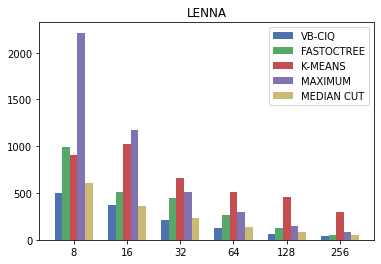

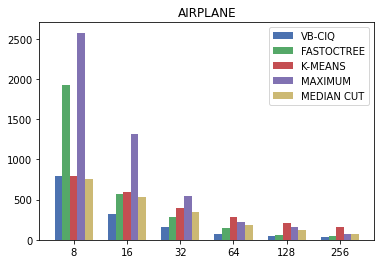

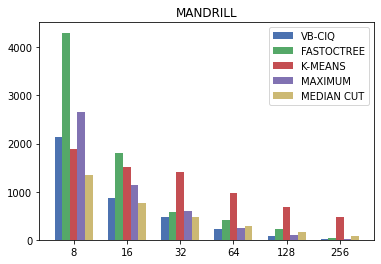

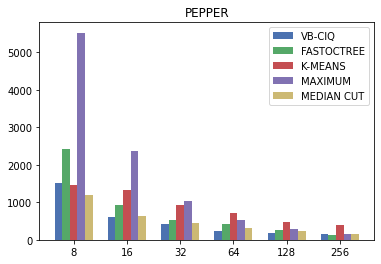

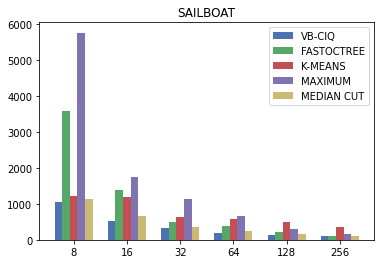

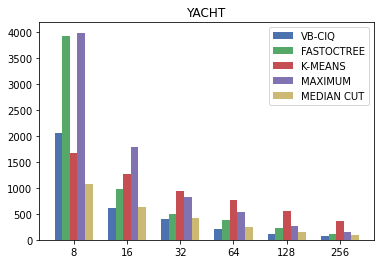

In [6]:
#MSE
for t,image in enumerate(images):
    fig, ax = plt.subplots()
    X = np.array([x*7  for x in range(1,7)])
    lines = []
    plt.xticks(X+2,labels = [2**x for x in range(3,9)])
    for method in methods:
        temp = []
        for i in range(3,9):
            temp.append(data[method][image][2**i]["MSE"])
        lines.append(temp)
    for i,line in enumerate(lines):
        plt.bar(x=X+i, height = line ,width = 1, label = methods[i])
    plt.title(legends[t].upper())
    plt.legend(methods)
    fig.savefig(f"results/MSE/bar/{image.upper()}.png")

C:\Users\agarw\AppData\Local\Temp/ipykernel_8320/3548700123.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2**k for k in range(2,9)])


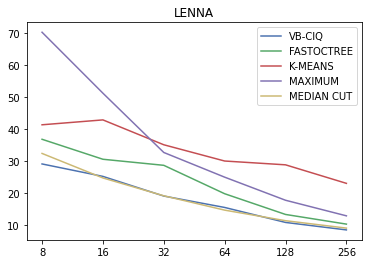

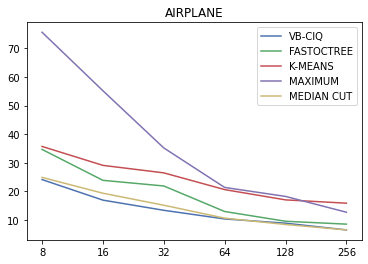

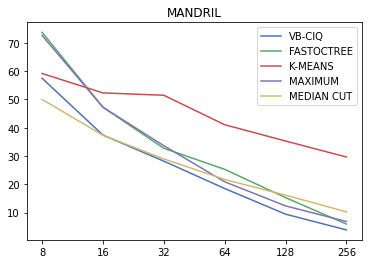

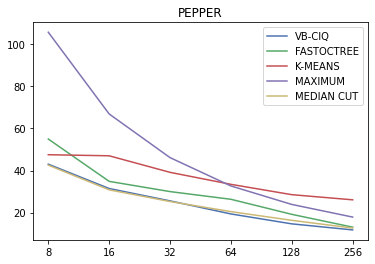

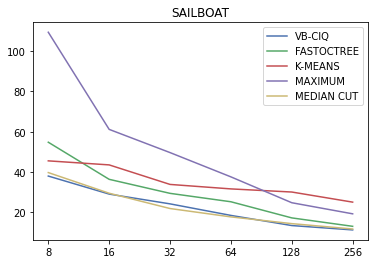

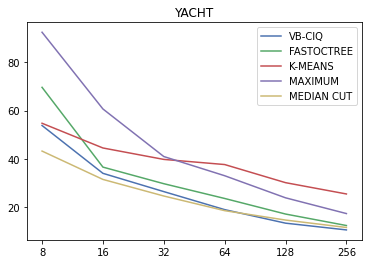

In [7]:
#MAE
for image in images:
    fig, ax = plt.subplots()
    ax.set_xticklabels([2**k for k in range(2,9)])
    lines = [] 
    for method in methods:
        temp = []
        for i in range(3,9):
            temp.append(data[method][image][2**i]["MAE"])
        lines.append(temp)
    for i,line in enumerate(lines):
        plt.plot(line)
    plt.legend(methods)
    plt.title(image.upper())
    fig.savefig(f"results/MAE/{image.upper()}.png")
    

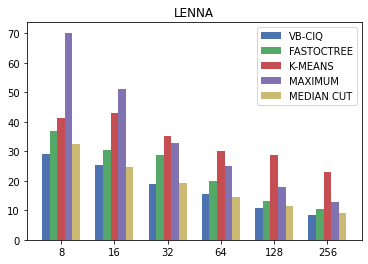

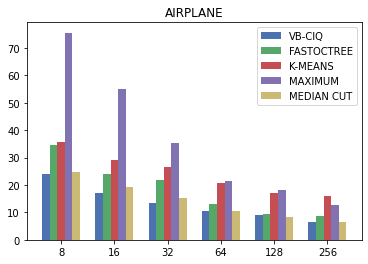

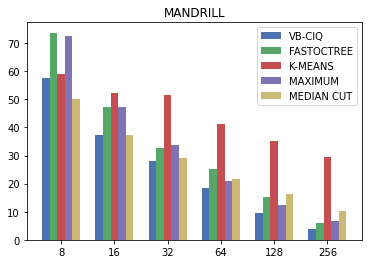

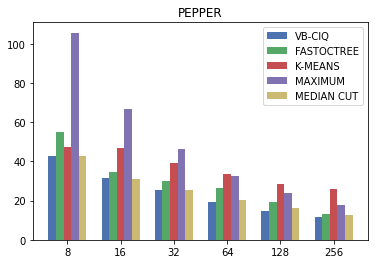

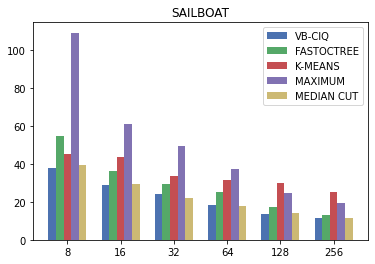

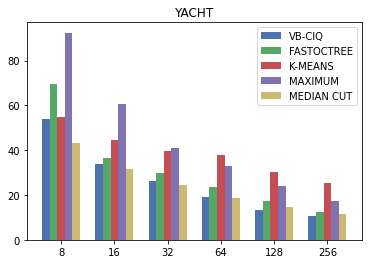

In [8]:
#MAE
for t,image in enumerate(images):
    fig, ax = plt.subplots()
    X = np.array([x*7  for x in range(1,7)])
    lines = []
    plt.xticks(X+2,labels = [2**x for x in range(3,9)])
    for method in methods:
        temp = []
        for i in range(3,9):
            temp.append(data[method][image][2**i]["MAE"])
        lines.append(temp)
    for i,line in enumerate(lines):
        plt.bar(x=X+i, height = line ,width = 1, label = methods[i])
    plt.title(legends[t].upper())
    plt.legend(methods)
    fig.savefig(f"results/MAE/bar/{image.upper()}.png")

In [9]:
import pandas as pd

In [10]:
#LENNA MSE
df = {}
image = "lenna"

df["Method"] = methods
for i in range(3,9):
    df[2**i] = []

for method in methods:
    for i in range(3,9):
        df[2**i].append(data[method][image][2**i]["MSE"])

df = pd.DataFrame(df)
df.set_index("Method" , inplace = True)
df.head()

,8,16,32,64,128,256
Method,,,,,,
VB-CIQ,503.574070,369.281639,207.752632,130.690823,67.292923,42.308445
FASTOCTREE,987.647945,507.316742,450.456593,265.209770,122.621670,55.947739
K-MEANS,911.157703,1022.705509,663.165855,515.051777,455.074005,292.212070
MAXIMUM,2213.185913,1173.658947,507.048058,292.800419,150.815689,80.739769
MEDIAN CUT,610.958435,362.091187,234.573029,140.244423,86.132957,55.715286


In [11]:
#MAE
df = {}


arr = []
for image in images:
    for method in methods:
        temp = [image.upper(),method]
        for i in range(3,9):
            temp.append(data[method][image][2**i]["MSE"])
        arr.append(temp)
df = pd.DataFrame(arr , columns = ["IMAGENAME","METHOD"] +[2**x for x in range(3,9)])
df =df.set_index("IMAGENAME")
df.to_excel("results/MSE/resultN.xlsx")

In [12]:
#MSE
df = {}


arr = []
for image in images:
    for method in methods:
        temp = [image.upper(),method]
        for i in range(3,9):
            temp.append(data[method][image][2**i]["MAE"])
        arr.append(temp)
df = pd.DataFrame(arr , columns = ["IMAGE","METHOD"] +[2**x for x in range(3,9)])
df =df.set_index("IMAGE")
df.to_excel("results/MAE/resultN.xlsx")